# BoolForge Tutorial #5: Example use cases of the random function generator

In this tutorial, we will focus on some use cases of the ability to generate a plethora of different types of random Boolean functions.
You will learn how to 
- compute the prevalence of canalization, k-canalization and nested canalization for functions of different degree,
- determine the distribution of the canalizing strength as well as the normalized input redundancy for different degrees,
- investigate the correlation between absolute bias and canalization, and
- generate and analyze all dynamically different nested canalizing functions of a given degree.

To ensure familiarity with these concepts, we highly recommended to first work the previous tutorial.

In [2]:
import boolforge
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Prevalence of canalization

While most 2-input Boolean functions are canalizing, canalization very quickly becomes an elusive property as the degree increases. Using `boolforge.random_function()`, we can easily approximate the probability that an n-input Boolean function has canalizing depth $k$.

,k=0,k=1,k=2,k=3,k=4,k=5,k=6
n=2,0.179,0.000,0.821,0.000,0.00,0.0,0.0
n=3,0.626,0.105,0.000,0.269,0.00,0.0,0.0
n=4,0.952,0.033,0.005,0.000,0.01,0.0,0.0
n=5,1.000,0.000,0.000,0.000,0.00,0.0,0.0
n=6,1.000,0.000,0.000,0.000,0.00,0.0,0.0


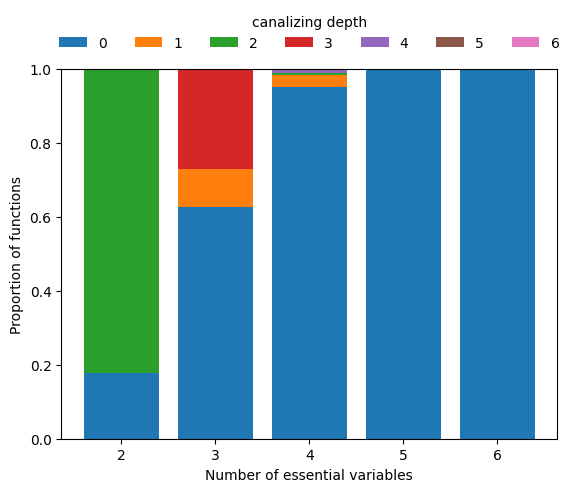

In [118]:
nsim = 1000
ns = np.arange(2,7)
canalizing_depths = np.arange(max(ns)+1)
count_canalizing_depths = np.zeros((len(ns),max(ns)+1))

for _ in range(nsim):
    for i,n in enumerate(ns):
        f = boolforge.random_function(n)
        count_canalizing_depths[i,f.get_canalizing_depth()] += 1
count_canalizing_depths /= nsim

fig,ax = plt.subplots()
for i,canalizing_depth in enumerate(canalizing_depths):
    ax.bar(ns,count_canalizing_depths[:,i],bottom=np.sum(count_canalizing_depths[:,:i],1),label=str(canalizing_depth))
ax.legend(frameon=False,loc='center',bbox_to_anchor=[0.5,1.1],ncol=8,title='canalizing depth')
ax.set_xticks(ns)
ax.set_xlabel('Number of essential variables')
ax.set_ylabel(f'Proportion of functions')

pd.DataFrame(count_canalizing_depths,index='n=' + ns.astype(str),columns='k=' + canalizing_depths.astype(str))



We see that hardly any Boolean function with $n\geq 5$ inputs is canalizing, let alone nested canalizing. This makes the finding that most Boolean functions in published Boolean gene regulatory network models are nested canalizing very surprising (Kadelka et al., Science Advances, 2024).

To zoom in on the few functions that are canalizing for higher $n$, we can simply require `depth=1` and repeat the above analysis.

,k=0,k=1,k=2,k=3,k=4,k=5,k=6
n=2,0.0,0.000,1.000,0.000,0.00,0.000,0.0
n=3,0.0,0.210,0.000,0.790,0.00,0.000,0.0
n=4,0.0,0.596,0.094,0.000,0.31,0.000,0.0
n=5,0.0,0.950,0.029,0.009,0.00,0.012,0.0
n=6,0.0,1.000,0.000,0.000,0.00,0.000,0.0


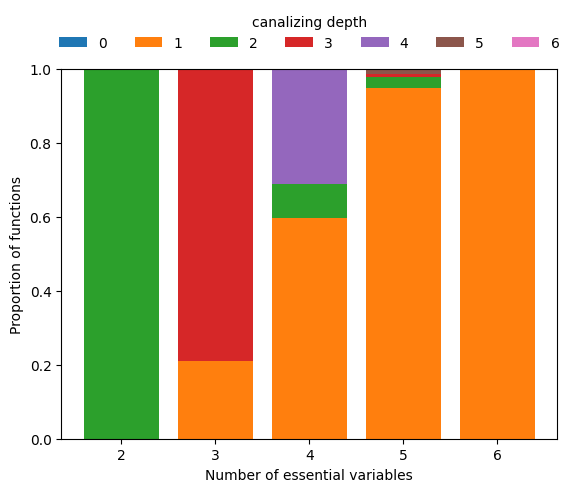

In [119]:
count_canalizing_depths = np.zeros((len(ns),max(ns)+1))

for _ in range(nsim):
    for i,n in enumerate(ns):
        f = boolforge.random_function(n,depth=1)
        count_canalizing_depths[i,f.get_canalizing_depth()] += 1
count_canalizing_depths /= nsim

fig,ax = plt.subplots()
for i,canalizing_depth in enumerate(canalizing_depths):
    ax.bar(ns,count_canalizing_depths[:,i],bottom=np.sum(count_canalizing_depths[:,:i],1),label=str(canalizing_depth))
ax.legend(frameon=False,loc='center',bbox_to_anchor=[0.5,1.1],ncol=8,title='canalizing depth')
ax.set_xticks(ns)
ax.set_xlabel('Number of essential variables')
ax.set_ylabel(f'Proportion of functions')

pd.DataFrame(count_canalizing_depths,index='n=' + ns.astype(str),columns='k=' + canalizing_depths.astype(str))


This analysis reveals that among Boolean functions of degree $n\geq 5$, functions with few conditionally canalizing variables are much more abundant than functions with more conditionally canalizing variables, which is mathematically obvious due to the recursive nature of the definition of k-canalization.

## Measures of collective canalization for different degree

Using a similar setup, we can investigate if and how the various measures of collective canalization, specifically canalizing strength (Kadelka et al., Advances in Applied Mathematics, 2023) and the normalized input redundancy (Gates et al., PNAS, 2021), change when the degree of the functions changes.

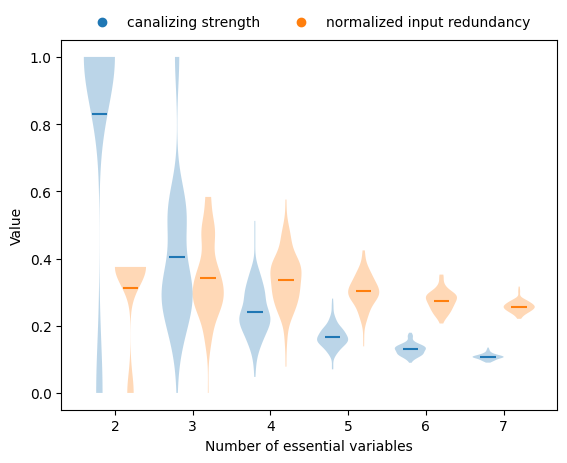

In [120]:
nsim = 100
ns = np.arange(2,8)
canalizing_strengths = np.zeros((len(ns),nsim))
input_redundancies = np.zeros((len(ns),nsim))

for j in range(nsim):
    for i,n in enumerate(ns):
        f = boolforge.random_function(n)
        canalizing_strengths[i,j] = f.get_canalizing_strength()
        input_redundancies[i,j] = f.get_input_redundancy()

width=0.4
violinplot_args = {'widths':width,'showmeans':True,'showextrema':False}
fig,ax = plt.subplots()
ax.violinplot(canalizing_strengths.T,positions=ns-width/2,**violinplot_args)
ax.scatter([], [], color='C0', label='canalizing strength')
ax.violinplot(input_redundancies.T,positions=ns+width/2,**violinplot_args)
ax.scatter([], [], color='C1', label='normalized input redundancy')
ax.legend(loc='center',bbox_to_anchor=[0.5,1.05],frameon=False,ncol=2)
ax.set_xlabel('Number of essential variables')
a=ax.set_ylabel('Value')


This plot reveals that, on average, both the canalizing strength and the normalized input redundancy decrease as the number of variables increases. However, the dependence of canalizing strength on degree is  much stronger.

If we stratify this analysis by canalizing depth (exact canalizing depth using `EXACT_DEPTH=True` or minimal canalizing depth using the default `EXACT_DEPTH=False`), we can confirm that functions with more conditionally canalizing variables tend to also have higher average collective canalization, irrespective of how it is measured. In other words, the various measures of canalization are all highly correlated.

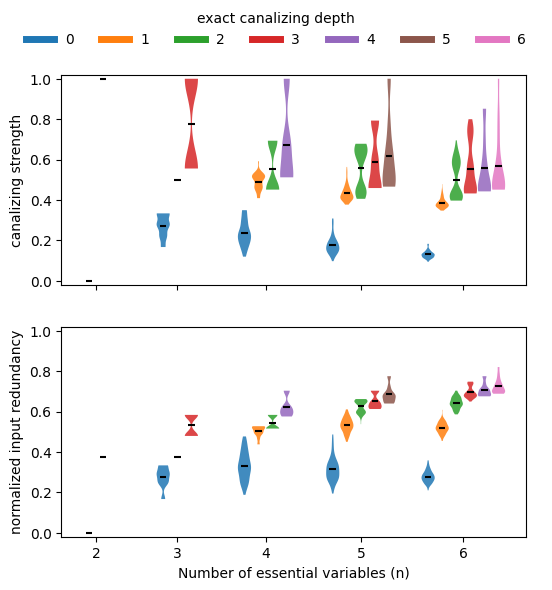

In [ ]:
nsim = 100
EXACT_DEPTH = False #Default: False
ns = np.arange(2,7)
canalizing_strengths = np.zeros((len(ns),max(ns)+1,nsim))
input_redundancies = np.zeros((len(ns),max(ns)+1,nsim))

for k in range(nsim):
    for i,n in enumerate(ns):
        for depth in np.append(np.arange(n-1),n):
            f = boolforge.random_function(n,depth=depth,EXACT_DEPTH=EXACT_DEPTH)
            canalizing_strengths[i,depth,k] = f.get_canalizing_strength()
            input_redundancies[i,depth,k] = f.get_input_redundancy()

width = 0.28
violinplot_args = {'widths': width, 'showmeans': True, 'showextrema': False}
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

base_gap = 1     # gap between groups
intra_gap = 0.3   # gap within group

max_depth = max(ns)

for ii, (data, label) in enumerate(zip(
    [canalizing_strengths, input_redundancies],
    ['canalizing strength', 'normalized input redundancy'])):

    positions = []
    values = []
    colors_used = []
    group_centers = []

    current_x = 0.0
    for i, n in enumerate(ns):
        valid_depths = np.append(np.arange(n-1), n)
        n_viols = len(valid_depths)

        # positions centered on each group's midpoint
        offsets = np.linspace(
            -(n_viols - 1) * intra_gap / 2,
            (n_viols - 1) * intra_gap / 2,
            n_viols
        )
        group_positions = current_x + offsets
        positions.extend(group_positions)
        group_centers.append(current_x)

        for depth in valid_depths:
            values.append(data[i, depth, :])
            colors_used.append('C'+str(depth))

        # advance x-position based on total group width
        group_width = (n_viols - 1) * intra_gap
        current_x += group_width / 2 + base_gap + width + intra_gap

    # plot violins one by one with colors
    for vpos, val, c in zip(positions, values, colors_used):
        vp = ax[ii].violinplot(val, positions=[vpos], **violinplot_args)
        for body in vp['bodies']:
            body.set_facecolor(c)
            body.set_alpha(0.85)
        vp['cmeans'].set_color('k')

    # axis labels
    ax[ii].set_ylabel(label)
    if ii == 1:
        ax[ii].set_xlabel('Number of essential variables (n)')
        ax[ii].set_xticks(group_centers)
        ax[ii].set_xticklabels(ns)
    ax[ii].set_ylim([-0.02,1.02])

# add legend for depth colors
depth_handles = [
    plt.Line2D([0], [0], color='C'+str(d), lw=5, label=f'{d}')
    for d in range(max_depth + 1)
]
a=fig.legend(handles=depth_handles, loc='upper center', ncol=7, frameon=False,
             title='exact canalizing depth' if EXACT_DEPTH else 'minimal canalizing depth')


## Correlation between canalization and bias 

Basically all metrics used to assess the sensitivity of Boolean functions (canalization, absolute bias, average sensitivity) are correlated. For example, functions with higher absolute bias are more likely to be canalizing.

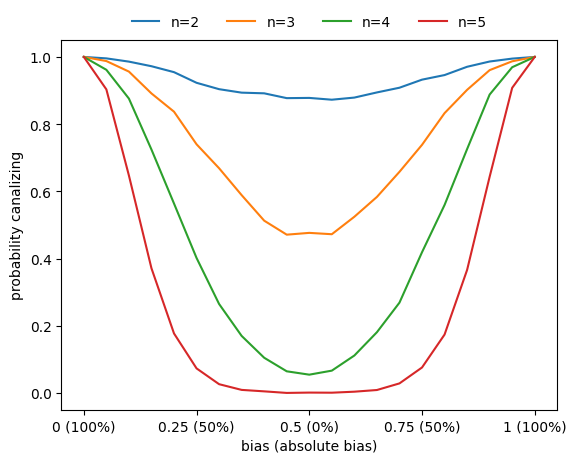

In [122]:
ns = np.arange(2,6)
nsim = 3000
n_steps = 21
bias_values = np.linspace(0,1,n_steps)
count_canalizing = np.zeros((len(ns),n_steps),dtype=int)
for i,n in enumerate(ns):
    for _ in range(nsim):
        for j,bias in enumerate(bias_values):
            f = boolforge.random_function(n,
                                        bias=bias,
                                        ALLOW_DEGENERATE_FUNCTIONS=True)
            if f.is_canalizing():
                count_canalizing[i,j] += 1

fig,ax = plt.subplots()
for i,n in enumerate(ns):
    ax.plot(bias_values,count_canalizing[i]/nsim,label=f'n={n}')
xticks = [0,0.25,0.5,0.75,1]
ax.set_xticks(xticks)
ax.set_xticklabels([f'{p} ({round(200*np.abs(p-0.5))}%)' for p in xticks])
ax.set_xlabel('bias (absolute bias)')
ax.set_ylabel('probability canalizing')
a=ax.legend(loc='center',frameon=False,bbox_to_anchor=[0.5,1.05],ncol=6)


Similarly, the probability that a function is degenerate (i.e., that it does not depend on all its variables) also increases as the absolute bias increases.

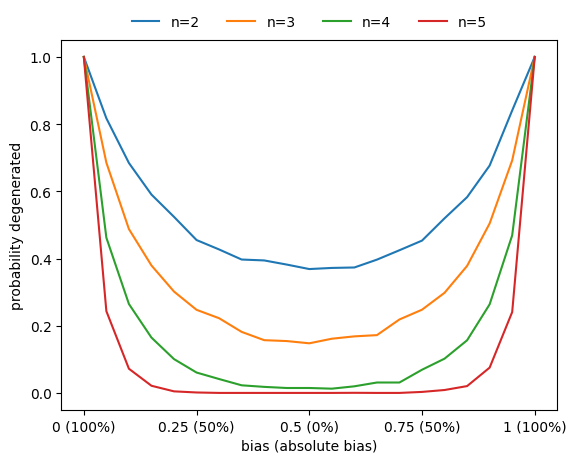

In [123]:
ns = np.arange(2,6)
nsim = 3000
n_steps = 21
bias_values = np.linspace(0,1,n_steps)
count_degenerate = np.zeros((len(ns),n_steps),dtype=int)
for i,n in enumerate(ns):
    for _ in range(nsim):
        for j,bias in enumerate(bias_values):
            f = boolforge.random_function(n,
                                        bias=bias,
                                        ALLOW_DEGENERATE_FUNCTIONS=True)
            if f.is_degenerate():
                count_degenerate[i,j] += 1

fig,ax = plt.subplots()
for i,n in enumerate(ns):
    ax.plot(bias_values,count_degenerate[i]/nsim,label=f'n={n}')
xticks = [0,0.25,0.5,0.75,1]
ax.set_xticks(xticks)
ax.set_xticklabels([f'{p} ({round(200*np.abs(p-0.5))}%)' for p in xticks])
ax.set_xlabel('bias (absolute bias)')
ax.set_ylabel('probability degenerate')
a=ax.legend(loc='center',frameon=False,bbox_to_anchor=[0.5,1.05],ncol=6)

## Analyzing functions with specific canalizing layer structure 

The average sensitivity of the Boolean functions governing the updates in a Boolean network, determines the stability of the network dynamics to perturbations. More generally, it determines the dynamical regime of the network (see later tutorials). The ability to generate canalizing functions with a specific canalizing layer structure enables us investigate the link between layer structure and average sensitivity, as well as other properties, such as canalizing strength or effective degree.

For nested canalizing functions of a given degree $n$, there exists a bijection betweeen their absolute bias and their canalizing layer structure. The function `boolforge.get_layer_structure_of_an_NCF_given_its_Hamming_weight(degree,hamming_weight)` implements this. Iterating over all possible absolute biases (parametrized by the possible Hamming weights), we can thus generate all dynamically different types of n-input nested canalizing functions and investigate their average sensitivity, which we can compute exactly for relatively low degree.

In [124]:
n = 5
all_possible_hamming_weights = np.arange(1,2**(n-1),2)
all_possible_absolute_biases = all_possible_hamming_weights / 2**(n-1)
n_functions = 2**(n-2)
average_sensitivites=np.zeros(n_functions)
canalizing_strengths=np.zeros(n_functions)
effective_degrees=np.zeros(n_functions)
layer_structures = []
for i,w in enumerate(all_possible_hamming_weights):
    layer_structures.append(boolforge.get_layer_structure_of_an_NCF_given_its_Hamming_weight(n,w)[1])
    f = boolforge.random_function(n,layer_structure=layer_structures[i])
    average_sensitivites[i] = f.get_average_sensitivity(EXACT=True,NORMALIZED=False)
    canalizing_strengths[i] = f.get_canalizing_strength()
    effective_degrees[i] = f.get_effective_degree()
number_of_layers = list(map(len,layer_structures))

pd.DataFrame(np.c_[all_possible_hamming_weights,
                   all_possible_absolute_biases,
                   list(map(str,layer_structures)),
                   number_of_layers,
                   average_sensitivites,
                   np.round(canalizing_strengths,4),
                   np.round(effective_degrees,4)],
            columns=['Hamming weight',
                     'Absolute bias',
                     'Layer structure',
                     'Number of layers',
                     'Average sensitivity',
                     'Canalizing strength',
                     'Effective degree'])

,Hamming weight,Absolute bias,Layer structure,Number of layers,Average sensitivity,Canalizing strength,Effective degree
0,1,0.0625,[5],1,0.3125,1.0,1.125
1,3,0.1875,"[3, 2]",2,0.6875,0.7705,1.3984
2,5,0.3125,"[2, 1, 2]",3,0.9375,0.6369,1.5938
3,7,0.4375,"[2, 3]",2,1.0625,0.5993,1.5833
4,9,0.5625,"[1, 1, 3]",3,1.1875,0.5033,1.7266
5,11,0.6875,"[1, 1, 1, 2]",4,1.3125,0.4657,1.8021
6,13,0.8125,"[1, 2, 2]",3,1.3125,0.4657,1.7708
7,15,0.9375,"[1, 4]",2,1.1875,0.5033,1.6094


We notice that nested canalizing functions with higher absolute bias tend to be more sensitive to input changes and also less canalizing. However, the relationship between absolute bias and these other metrics is far from monotonic. Further, we notice that there is a perfect correlation between the average sensitivity of a nested canalizing function and its canalizing strength, and a near perfect correlation between average sensitivity and effective degree.

To investigate the non-monotonic behavior further, we can vary the degree and create line plots that reveal a clear pattern, as shown in (Kadelka et al., Physica D, 2017).

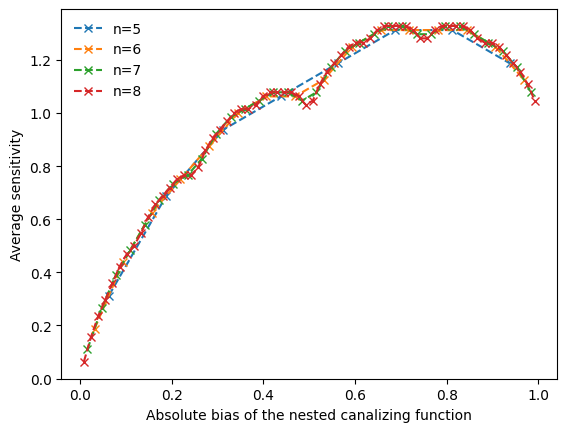

In [117]:
ns = np.arange(5,9)
f,ax = plt.subplots()
for n in ns:
    all_possible_hamming_weights = np.arange(1,2**(n-1),2)
    all_possible_absolute_biases = all_possible_hamming_weights / 2**(n-1)
    n_functions = 2**(n-2)
    average_sensitivites=np.zeros(n_functions)
    layer_structures = []
    for i,w in enumerate(all_possible_hamming_weights):
        layer_structures.append(boolforge.get_layer_structure_of_an_NCF_given_its_Hamming_weight(n,w)[1])
        f = boolforge.random_function(n,layer_structure=layer_structures[i])
        average_sensitivites[i] = f.get_average_sensitivity(EXACT=True,NORMALIZED=False)
    number_of_layers = list(map(len,layer_structures))
    ax.plot(all_possible_absolute_biases,average_sensitivites,'x--',label=f'n={n}')
ax.legend(loc='best',frameon=False)
ax.set_xlabel('Absolute bias of the nested canalizing function')
a=ax.set_ylabel('Average sensitivity')